In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"SPY.csv", index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [3]:
df['LogReturn'] = np.log(df['Close']).diff()
df.head()

,Open,High,Low,Close,Adj Close,Volume,LogReturn
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,0.002644
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,0.000704
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,0.004212
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,0.003322


In [4]:
df['LogReturn'] = df['LogReturn'].shift(-1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,LogReturn
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,0.002644
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,0.000704
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,0.004212
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,0.003322
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,0.001396


In [5]:
# Rolling mean Calculation with sample size 30 and 10

df['SlowSMA'] = df['Close'].rolling(30).mean()
df['FastSMA'] = df['Close'].rolling(10).mean()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,LogReturn,SlowSMA,FastSMA
Date,,,,,,,,,
2018-12-21,246.740005,249.710007,239.979996,240.699997,234.845886,255345600,-0.026778,266.449000,256.906999
2018-12-24,239.039993,240.839996,234.270004,234.339996,228.640564,147311600,0.049290,264.910333,253.933998
2018-12-26,235.970001,246.179993,233.759995,246.179993,240.192596,218485400,0.007648,263.857666,252.138997
2018-12-27,242.570007,248.289993,238.960007,248.070007,242.036667,186267300,-0.001291,263.040999,250.399998
2018-12-28,249.580002,251.399994,246.449997,247.750000,241.724442,153100200,NaN,262.230666,248.637999


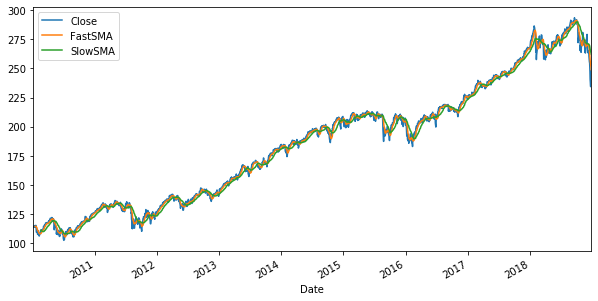

In [6]:
df[['Close', 'FastSMA', 'SlowSMA']].plot(figsize=(10, 5))

# not easy to tell where crossover points are since too many data points

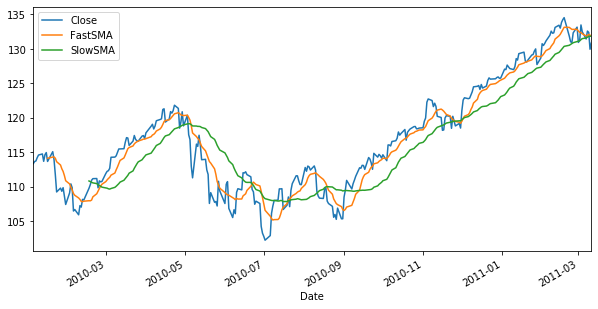

In [7]:
# just first 300 points...

df[['Close', 'FastSMA', 'SlowSMA']].iloc[:300].plot(figsize=(10, 5))

In [8]:
# calculate where fast SMA is larger than slow SMA
# np.where function returning 1 where arg = true, 0 otherwise (like vectorized if statement)

df['Signal'] = np.where(df['FastSMA'] >= df['SlowSMA'], 1, 0)

# print out df portion

df.iloc[80:].head(10)

,Open,High,Low,Close,Adj Close,Volume,LogReturn,SlowSMA,FastSMA,Signal
Date,,,,,,,,,,
2010-04-29,120.099998,121.110001,120.070000,120.860001,98.780228,193775000,-0.017107,118.891334,120.360999,1
2010-04-30,120.879997,121.010002,118.779999,118.809998,97.104759,270000900,0.012879,118.950333,120.305999,1
2010-05-03,119.379997,120.680000,119.199997,120.349998,98.363426,182747900,-0.023796,119.096333,120.359999,1
2010-05-04,119.010002,119.029999,116.919998,117.519997,96.050430,360353400,-0.005974,119.127333,120.023999,1
2010-05-05,116.559998,117.800003,115.970001,116.820000,95.478325,328973200,-0.033778,119.107667,119.639999,1
2010-05-06,116.260002,117.000000,105.000000,112.940002,92.307137,647356600,-0.014987,118.977667,118.831999,0
2010-05-07,112.639999,113.769997,109.410004,111.260002,90.934059,637558800,0.043099,118.798000,117.777000,0
2010-05-10,115.809998,116.650002,114.910004,116.160004,94.938896,396159600,-0.002845,118.784000,117.258000,0
2010-05-11,115.070000,117.360001,114.910004,115.830002,94.669189,317849800,0.013889,118.734334,116.993000,0


In [9]:
# shift signal col forward so we can look at previous on the same row
# we want to buy when fast sma overtakes slow, fast was previously less and became greater
# opposite when we want to sell

df['PrevSignal'] = df['Signal'].shift(1)
df['Buy'] = (df['PrevSignal'] == 0) & (df['Signal'] == 1) # Fast < Slow --> Fast > Slow
df['Sell'] = (df['PrevSignal'] == 1) & (df['Signal'] == 0) # Fast > Slow --> Fast < Slow
df.iloc[80:].head(10)

,Open,High,Low,Close,Adj Close,Volume,LogReturn,SlowSMA,FastSMA,Signal,PrevSignal,Buy,Sell
Date,,,,,,,,,,,,,
2010-04-29,120.099998,121.110001,120.070000,120.860001,98.780228,193775000,-0.017107,118.891334,120.360999,1,1.0,False,False
2010-04-30,120.879997,121.010002,118.779999,118.809998,97.104759,270000900,0.012879,118.950333,120.305999,1,1.0,False,False
2010-05-03,119.379997,120.680000,119.199997,120.349998,98.363426,182747900,-0.023796,119.096333,120.359999,1,1.0,False,False
2010-05-04,119.010002,119.029999,116.919998,117.519997,96.050430,360353400,-0.005974,119.127333,120.023999,1,1.0,False,False
2010-05-05,116.559998,117.800003,115.970001,116.820000,95.478325,328973200,-0.033778,119.107667,119.639999,1,1.0,False,False
2010-05-06,116.260002,117.000000,105.000000,112.940002,92.307137,647356600,-0.014987,118.977667,118.831999,0,1.0,False,True
2010-05-07,112.639999,113.769997,109.410004,111.260002,90.934059,637558800,0.043099,118.798000,117.777000,0,0.0,False,False
2010-05-10,115.809998,116.650002,114.910004,116.160004,94.938896,396159600,-0.002845,118.784000,117.258000,0,0.0,False,False
2010-05-11,115.070000,117.360001,114.910004,115.830002,94.669189,317849800,0.013889,118.734334,116.993000,0,0.0,False,False


In [10]:
# function that will determine for each step if we're invested

is_invested = False
def assign_is_invested(row):
    global is_invested # --> to be able to modify it within the function
    if is_invested and row['Sell']:
        is_invested = False
    if not is_invested and row['Buy']:
        is_invested = True
        
    # otherwise, just remain
    return is_invested

df['IsInvested'] = df.apply(assign_is_invested, axis=1)
df.iloc[80:].head(10)

,Open,High,Low,Close,Adj Close,Volume,LogReturn,SlowSMA,FastSMA,Signal,PrevSignal,Buy,Sell,IsInvested
Date,,,,,,,,,,,,,,
2010-04-29,120.099998,121.110001,120.070000,120.860001,98.780228,193775000,-0.017107,118.891334,120.360999,1,1.0,False,False,True
2010-04-30,120.879997,121.010002,118.779999,118.809998,97.104759,270000900,0.012879,118.950333,120.305999,1,1.0,False,False,True
2010-05-03,119.379997,120.680000,119.199997,120.349998,98.363426,182747900,-0.023796,119.096333,120.359999,1,1.0,False,False,True
2010-05-04,119.010002,119.029999,116.919998,117.519997,96.050430,360353400,-0.005974,119.127333,120.023999,1,1.0,False,False,True
2010-05-05,116.559998,117.800003,115.970001,116.820000,95.478325,328973200,-0.033778,119.107667,119.639999,1,1.0,False,False,True
2010-05-06,116.260002,117.000000,105.000000,112.940002,92.307137,647356600,-0.014987,118.977667,118.831999,0,1.0,False,True,False
2010-05-07,112.639999,113.769997,109.410004,111.260002,90.934059,637558800,0.043099,118.798000,117.777000,0,0.0,False,False,False
2010-05-10,115.809998,116.650002,114.910004,116.160004,94.938896,396159600,-0.002845,118.784000,117.258000,0,0.0,False,False,False
2010-05-11,115.070000,117.360001,114.910004,115.830002,94.669189,317849800,0.013889,118.734334,116.993000,0,0.0,False,False,False


In [11]:
df['AlgoLogReturn'] = df['IsInvested'] * df['LogReturn'] # True = 1, False = 0 ?
df.iloc[80:].head(10)

,Open,High,Low,Close,Adj Close,Volume,LogReturn,SlowSMA,FastSMA,Signal,PrevSignal,Buy,Sell,IsInvested,AlgoLogReturn
Date,,,,,,,,,,,,,,,
2010-04-29,120.099998,121.110001,120.070000,120.860001,98.780228,193775000,-0.017107,118.891334,120.360999,1,1.0,False,False,True,-0.017107
2010-04-30,120.879997,121.010002,118.779999,118.809998,97.104759,270000900,0.012879,118.950333,120.305999,1,1.0,False,False,True,0.012879
2010-05-03,119.379997,120.680000,119.199997,120.349998,98.363426,182747900,-0.023796,119.096333,120.359999,1,1.0,False,False,True,-0.023796
2010-05-04,119.010002,119.029999,116.919998,117.519997,96.050430,360353400,-0.005974,119.127333,120.023999,1,1.0,False,False,True,-0.005974
2010-05-05,116.559998,117.800003,115.970001,116.820000,95.478325,328973200,-0.033778,119.107667,119.639999,1,1.0,False,False,True,-0.033778
2010-05-06,116.260002,117.000000,105.000000,112.940002,92.307137,647356600,-0.014987,118.977667,118.831999,0,1.0,False,True,False,-0.000000
2010-05-07,112.639999,113.769997,109.410004,111.260002,90.934059,637558800,0.043099,118.798000,117.777000,0,0.0,False,False,False,0.000000
2010-05-10,115.809998,116.650002,114.910004,116.160004,94.938896,396159600,-0.002845,118.784000,117.258000,0,0.0,False,False,False,-0.000000
2010-05-11,115.070000,117.360001,114.910004,115.830002,94.669189,317849800,0.013889,118.734334,116.993000,0,0.0,False,False,False,0.000000


In [12]:
# Total algo log return
df['AlgoLogReturn'].sum()

# 30% seems good

0.3049019540291429

In [13]:
# Total return buy-and-hold
# just invested on day 1 and never sold
# --> cumulative return = just the sum of log returns column
df['LogReturn'].sum()

# 78% --> trend following strategy performs worse than simply buying and holding

0.7821162403084001

In [14]:
# standard deviation and sharpe ratio of alogorithm return
df['AlgoLogReturn'].std(), df['AlgoLogReturn'].mean()/df['AlgoLogReturn'].std()

(0.006089880064170894, 0.02213394709006064)

In [15]:
# same for buy and hold strategy
df['LogReturn'].std(), df['LogReturn'].mean()/df['LogReturn'].std()

# lower risk and lower sharpe ratio

(0.009446971193167578, 0.03660042364089666)

### Searching for Fast and Slow Hyperparameters

In [16]:
# optimize the number of values used in Fast and Slow SMA
# --> split data into train and test set
# --> only choose Fast and Slow SMA with best returns on train set only
# generally think of test set as validation set, but here opposite

Ntest = 1000
def trend_following(df, fast, slow):
    global is_invested
    df['SlowSMA'] = df['Close'].rolling(slow).mean()
    df['FastSMA'] = df['Close'].rolling(fast).mean()
    df['Signal'] = np.where(df['FastSMA'] >= df['SlowSMA'], 1, 0)
    df['PrevSignal'] = df['Signal'].shift(1)
    df['Buy'] = (df['PrevSignal'] == 0) & (df['Signal'] == 1)
    df['Sell'] = (df['PrevSignal'] == 1) & (df['Signal'] == 0)
    
    
    # Split into train and test (after to avoid missing values)
    train = df.iloc[:-Ntest]
    test = df.iloc[-Ntest:]
    
    is_invested = False
    df.loc[:-Ntest, 'IsInvested'] = train.apply(assign_is_invested, axis=1)
    df.loc[:-Ntest, 'AlgoLogReturn'] = train['IsInvested'] * train['LogReturn']
    
    is_invested = False
    df.loc[-Ntest:, 'IsInvested'] = test.apply(assign_is_invested, axis=1)
    df.loc[-Ntest:, 'AlgoLogReturn'] = test['IsInvested'] * test['LogReturn']
    
    # return both train/test score, exclue last value in sum as test set has no final return since shifted earlier
    return train['AlgoLogReturn'][:-1].sum(), test['AlgoLogReturn'][:-1].sum()

In [17]:
# check
trend_following(df, 10, 30) # results sum up to 30% so that makes sense

(0.21371231572708904, 0.09118963830205384)

In [18]:
# Let's do a grid search
best_fast = None
best_slow = None
best_score = float('-inf') # - infinity so any score we get can beat it
for fast in range(3, 30): # loop through fast and slow values to try, arbitrary values
    for slow in range(fast + 5, 80):
        score, _ = trend_following(df, fast, slow) # ignore 2nd return value because only use train score to evaluate parameters
        if score > best_score:
            best_fast = fast
            best_slow = slow
            best_score = score
best_fast, best_slow, trend_following(df, best_fast, best_slow)

# 43%  for train score, test score 9% for buy and hold context

(16, 33, (0.43459304796456966, 0.08889132894199214))

In [19]:
# split data for train/test and make copies for later
train = df.iloc[:-Ntest].copy()
test = df.iloc[-Ntest:].copy()

In [20]:
# Total return buy-and-hold train
train['LogReturn'][:-1].sum()
# 60% again, buy-and-hold wins

0.5970866514889392

In [21]:
# Total return buy-and-hold test
# Last value is NaN, just ignoring it for uniformity
test['LogReturn'][:-1].sum()

# 19% again, buy-and-hold wins

0.19307543946998518

In [22]:
# Sharpe Ratio algo vs. Sharpe Ratio buy-and-hold train
train['AlgoLogReturn'].mean()/train['AlgoLogReturn'].std(), train['LogReturn'].mean()/train['LogReturn'].std()

# SR of the algo with slightly higher, not being invested does at least reduce variance

(0.049489198368311275, 0.04642867836819648)

In [23]:
# Sharpe Ratio algo vs. Sharpe Ratio buy-and-hold test
test['AlgoLogReturn'].mean()/test['AlgoLogReturn'].std(), test['LogReturn'].mean()/test['LogReturn'].std()

# Buy-and-hold wins again

(0.016179303103405873, 0.022384106381325427)

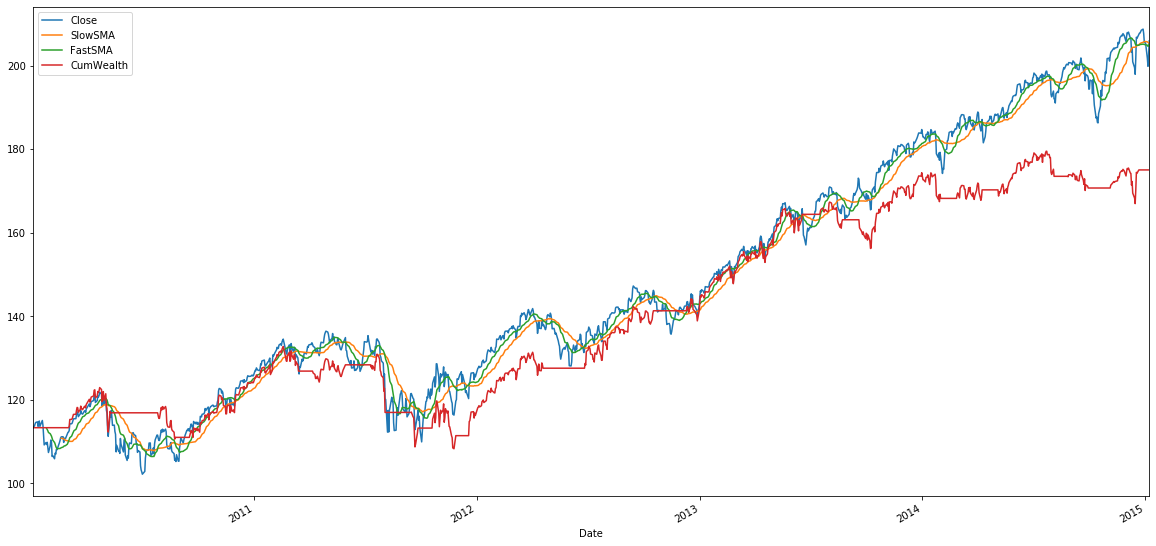

In [24]:
# Wealth over time
train['CumLogReturn'] = train['AlgoLogReturn'].cumsum().shift(1) # returns were shifted backwards
train['CumWealth'] = train.iloc[0]['Close'] * np.exp(train['CumLogReturn'])
train[['Close', 'SlowSMA', 'FastSMA', 'CumWealth']].plot(figsize=(20, 10))

# some areas have a straight line on cumulative wealth, that should start at the sell points and end at the buy points
# unfortunately, algo seems to react too slowly --> investing after stock rises and sell after stock drops
# exp moving average doesnt like as much as simple moving average so might wanna try as well